In [1]:
%pylab inline
import gc
import galsim
import numpy as np
import astropy.io.fits as pyfits

import fpfsBase

Populating the interactive namespace from numpy and matplotlib


In [2]:
cd wrkDir/FPFS2/sim

/lustre/work/xiangchong.li/work/FPFS2/sim


In [3]:
ngrid=64
nx=100;ny=100
ngal=nx*ny
psfFWHM=0.60
scale=0.168
# Noise
corPre      =   'corPre'
corFname    =   os.path.join(corPre,'correlation.fits')
ngrid=64

In [4]:
%%time
out={}
for icut in range(11,16):
    rcut=icut
    beg=ngrid//2-rcut
    end=beg+2*rcut
    fpTestNoi=fpfsBase.fpfsTestNoi(ngrid=2*rcut)
    powList=[]
    for j in range(200):
        noiAll=pyfits.getdata('sim20210301/noise/noi%04d.fits' %j)
        imgList=[noiAll[i//nx*ngrid+beg:i//nx*ngrid+end,i%nx*ngrid+beg:i%nx*ngrid+end] for i in range(ngal)]
        pp=fpTestNoi.test(imgList)
        powList.append(np.average(pp,axis=0))
        del pp,imgList
        gc.collect()
    powList=np.stack(powList)
    ppave=np.average(powList,axis=0)
    out.update({'%s' %icut:ppave})
    del powList,ppave,fpTestNoi
    gc.collect()
np.save('corPre/noiPows2.npy',out)

CPU times: user 16min 36s, sys: 5min 58s, total: 22min 35s
Wall time: 22min 47s


In [11]:
#out=np.load('corPre/noiPows2.npy',allow_pickle=True)
rcut=15
beg=ngrid//2-rcut
end=beg+2*rcut
fpTestNoi=fpfsBase.fpfsTestNoi(ngrid=2*rcut,noiFit=out['%s'%rcut])
#fpTestNoi=fpfsBase.fpfsTestNoi(ngrid=2*rcut,noiModel=powModel)
powList=[]
for j in range(100):
    noiAll=pyfits.getdata('sim20210301/noise/noi%04d.fits' %j)
    imgList=[noiAll[i//nx*ngrid+beg:i//nx*ngrid+end,i%nx*ngrid+beg:i%nx*ngrid+end] for i in range(ngal)]
    pp=fpTestNoi.test(imgList)
    powList.append(np.average(pp,axis=0))
    del pp,imgList
    gc.collect()
powList=np.stack(powList)
ppave=np.average(powList,axis=0)

0.07371204700155151


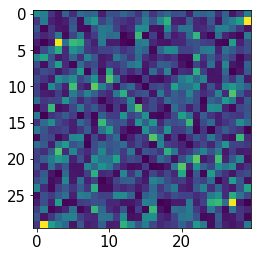

In [12]:
corave=np.fft.fftshift(np.abs(np.fft.ifft2(ppave)))
plt.imshow(corave)
print(corave.max())

2.3832320782415626


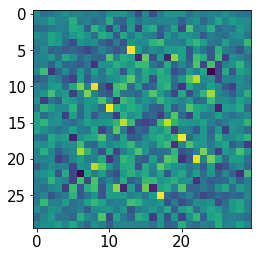

In [13]:
plt.imshow(ppave)
print(ppave.max())

(array([  4.,  34.,  85., 162., 248., 219., 106.,  26.,   8.,   8.]),
 array([-2.01138339, -1.57192184, -1.1324603 , -0.69299875, -0.2535372 ,
         0.18592434,  0.62538589,  1.06484744,  1.50430898,  1.94377053,
         2.38323208]),
 <a list of 10 Patch objects>)

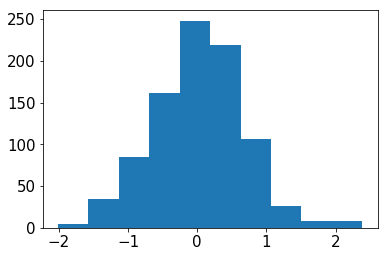

In [14]:
plt.hist(np.ravel(ppave))